# Réseaux de neurones seq2seq sur des séries temporelles

Le plan de match est d'abord d'entraîner un tel réseau sur un tout petit dataset de 2 signaux sinusoidaux simples, puis de tenter de prédire des signaux de plus en plus complexes et de natures un peu différente, pour en venir à modifier l'architecture du réseau de neurones. 

## Comment utiliser ce notebook au format ".ipynb" ?

Mis à part les versions exportées et le code Python mis à disposition, il est plus intéressant de rouler le code dans un Jupyter notebook pour avoir une approche itérative. Dans un tel notebook, il est possible de rouler chaque cellule une par une (avec "`CTRL+ENTER`" ou avec "`SHIFT+ENTER`") ou aussi de rouler à nouveau toutes les cellules (cliquer dans les menus sur "`Kernel>Restart`" pour recommencer, et puis faire "`Cell>Run all`"). 

Pour installer jupyter, il est parfois possible de rouler la commande suivante : "`pip install jupyter`", cependant d'autres méthodes d'installation peuvent être préférables lorsque disponibles. Il est parfois possible de rouler au préalable la commande "`sudo apt-get install ipython ipython-notebook`" sur ubuntu avant de rouler l'autre commande pip par exemple. 
Il se peut qu'il soit requis de faire au préalable "`pip install --upgrade pip`" dépendamment de votre installation actuelle. 

Une fois jupyter correctement installé, il est possible d'ouvrir ce notebook en ouvrant le dossier dans lequel il se trouve en ligne de commande, puis en roulant la commande "`jupyter notebook`". Dépendemment de votre installation, il se peut que vous devez plutôt rouler la commande "`ipython notebook`", et cela potentiellement en mettant une lettre majuscule à iPython, tel que "`iPython notebook`". Suite à avoir roulé la commande, ipython ouvrira dans le navigateur web et il sera possible d'ouvrir le notebook qui lui a l'extension "`.ipynb`".

## Exercices

Note: le dataset change en fonction de l'exercice, et en conséquence, la structure du réseau de neurone changera aussi pour s'adapter, de façon automatique selon la section `Paramètres du réseau de neuronne` plus bas. Il restera au participant de modifier d'avantage ces paramètres afin de réellement pouvoir prédire le signal correctement. Les 2 derniers exercices, 5 et 6, sont à propos de modifier l'architecture du réseau de neurones de façon considérable. 

### Exercice 1

En théorie, il est possible pour cet exercice de créer une estimation parfaite du signal (excepté certaines erreurs d'arrondi, etc). Cet exercice est surtout pour s'approprier le code et explorer le fonctionnement de seq2seq au niveau des dimensions et du lien avec le code avec TensorFlow avant de passer aux exercices suivants. 

Nous avons 2 séries temporelles différentes à prédire en même temps: notre réseau de neurones est multidimensionnel car il prédit plusieurs séries à la fois: un sinus et son cosinus. Ainsi, à chaque étape de temps, un encodeur accepte en argument les 2 valeurs de "hauteur" de ces signaux. L'encodeur lis ces valeurs pour 10 étapes de temps, et il faut prédire les 10 prochaines valeurs dans le temps par le biais du décodeur. Plus de détails sur ce signal se trouvent dans le fichier `datasets.py` où les fonction des datasets sont définies. 

L'exercice 1 devrait fonctionner du premier coup avec le code actuel. Le code a été fait de façon à être améliorable afin de mieux résoudre cet exercice, quoiqu'il est possible de passer à l'exercice 2 directement aussi. Voici par exemple le résultat que vous devriez obtenir avec les paramètres déjà fourni, mais il est possible de faire bien mieux que cela : 

<img src="images/E1.png" />


### Exercice 2

Ici on a un seul signal à prédire plutôt que 2 en même temps, cependant ce signal est plus compliqué à prédire. C'est une combinaison 2 fréquences, et ces fréquences peuvent varier librement dans une intervalle de fréquence pré-établie. De plus, ces séquences sont plus longues comparativement à ceux de l'exercice 1. 

Pour réussir cet exercice (et les suivants) avec des prédictions du moins presque correctes à l'oeil, il sera nécessaire de modifier les paramètres du réseau de neurones. Indice: augmentez le nombre de neurones, le nombre d'étapes d'entrainement, revoir les hyperparamètres de l'optimisation (ex: taux d'apprentissage), augmenter de couches de neurones empilées, etc. Par exemple, il est possible d'obtenir cette prédiction avec un `nb_iters = 2500`, un `batch_size = 50` et un `hidden_dim = 35` : 

<img src="images/E2.png" />

Rappel : Le réseau de neurones ne voit seulement que la partie gauche du graphique et ne voit aucune données de plus que ceux qui sont visibles pour effectuer cette prédiction. Voici 4 autres résultats, mais maintenant pour un réseau de neurones considérablement plus gros que le précédent (3 cellules récurrentes de neurones empilées en profondeur et 500 neurones par cellule) : 

<img src="images/E2_1.png" />

<img src="images/E2_2.png" />

<img src="images/E2_3.png" />

<img src="images/E2_4.png" />

Il serait possible d'obtenir des résultats encore meilleurs et avec moins de puissance de calcul en cherchant de meilleurs paramètres. 

### Exercice 3

Cet exercice ressemble beaucoup à l'exercice 2. Cependant, en plus du fait que les longeurs d'onde peuvent varier dans ce signal, j'y ai aussi ajouté un peu de bruit: des oscillations hasardeuses néfastes. Le but est donc de prédire la suite de ce signal, et cette prédiction doit faire comme si le bruit néfaste n'existait pas afin de faire une prédiction lisse. Ainsi, le réseau de neurones doit ignorer le bruit dans le signal et isoler les 2 bonnes fréquences à prédire. Les Y fournis seront, en conséquence, lisses, comparativement aux X où il y aura du désordre. Cette image représente bien le problème où on voit que les valeurs passées sont peu lisses et que les valeurs futures sont très lisses, cela à cause du hasard pour les valeurs passées : 

<img src="images/E3.png" />

Voici des exemples de résultats de prédictions pour un réseau de neurones assez gros qui a été mis sur ce problème, quoiqu'il serait encore possible d'améliorer le résultat des prédictions : 

<img src="images/E3_1.png" />

<img src="images/E3_2.png" />

<img src="images/E3_3.png" />

<img src="images/E3_4.png" />

Il serait possible de modifier cet exercice afin que le but de la prédiction soit de retrouver le signal original avec le décodeur plutôt que d'en prédire la suite. Cela s'appelle un "denoising autoencoder" (DA) et peut être utilisé même sur des images ou d'autres types de données dépendamment de l'architecture neuronale utilisée. 

### Exercice 4

Ici il s'agit de modifier l'architecture du réseau de neurones. 

Présentement, l'encodeur et le décodeur utilisent la même cellule récurrente avec un appel de fonction automatique à `tf.nn.seq2seq.basic_rnn_seq2seq`. L'objectif de cet exercice est d'utiliser du feedback dans le décodeur (envoyer les prédictions en tant qu'entrée suivante dans le temps) plutôt que de seulement faire des prédictions. L'architecture désirée est telle que dans l'image suivante, mais ici avec potentiellement plusieurs cellules empilées : 

<img src="https://esciencegroup.files.wordpress.com/2016/03/seq2seq.jpg?w=625" />

Pour réaliser cela, il faudrait remplacer l'appel à `tf.nn.seq2seq.basic_rnn_seq2seq` par autre chose. Il y aurait probalement une fonction adéquoite dans le module `tf.nn.seq2seq`, sinon il est certainement possible d'appeler les deux blocs de cellules de rnn (le décodeur et l'encodeur) manuellement avec la méthode `__call__` (l'opérateur parenthèse) de ces cellules. Par exemple pour résoudre ce problème, pour la partie du décodeur, il serait possible d'appeler la méthode call des sorties précédentes, et cela en boucle pour chaque étape de temps future. Plus d'informations à : https://www.tensorflow.org/versions/r0.12/api_docs/python/rnn_cell/rnn_cells_for_use_with_tensorflow_s_core_rnn_methods

Voici l'implémentation de `tf.nn.seq2seq.basic_rnn_seq2seq`, à la ligne 148 en date d'avril 2017 : https://github.com/petewarden/tensorflow_ios/blob/master/tensorflow/python/ops/seq2seq.py#L148


Indice : il serait possible de s'inspirer partiellement du code officiel de TensorFlow suivant, spécifiquement, le code sous le commentaire "`This builds an unrolled LSTM for tutorial purposes only.`". En date d'avril 2017, c'est la ligne de code 143 de ce fichier que voici : https://github.com/tensorflow/models/blob/master/tutorials/rnn/ptb/ptb_word_lm.py#L143

### Exercice 5

Pour l'exercice 3, le problème est beaucoup plus difficile que pour les exercices précédents. Il s'agit de prédire les valeures futures pour le Bitcoin. Comme pour l'exercice 1, on a 2 signaux en entrées et aussi 2 signaux en sortie: ce sont les valeurs BTC/USD et BTC/EUR au travers du temps, soit des historiques de valeurs du Bitcoin par rapport au dollar américain et au euro. Le Bitcoin est une cryopto-monnaie et n'est pas une monnaie officielle, mais cela ne l'empêche pas d'avoir une valeur qui varie pour faire des échanges, au même titre que les monnaies normales. 

En réalité, il faudrait utiliser des données plus abondantes et massives pour obtenir un modèle satisfaisant (par exemple, un historique de prix aux minutes plutôt qu'aux jours). Présentement, il serait difficile de créer un prédicteur correct à cause des limitations actuelles sur le jeu de données fourni, mais le problème reste intéressant. En préparation pour l'exercice 5 et 6 où vous devrez modifier l'architecture du réseau de neurones et puis trouver plus de données, tentez de rouler le réseau de neurones sur ce jeux de données. 

Voici par exemple une prédiction : 
<img src="images/E5.png" />

### Exercice 6

Basé sur l'exercice 4 et 5, il serait possible de faire des ajouts aux deux dimensions d'entrées (BTC/USD et BTC/EUR) seraient de créer des dimensions supplémentaires contenant des ondes sinusoidales (ou des ondes triangulaires ou en scie, etc) qui cyclent avec les heures, les jours, les mois, les années et les lunes, etc. Pour cela, il faudrait modifier le ficher `datasets.py`. Il serait aussi intéressant d'obtenir d'autres signaux, tels que des signaux de température de différents emplacements dans le monde, etc. Beaucoup de sources de données pourraient être aggrégées et combinées avec d'autres données financières, telles que le Dow Jones, le S&P 500, une analyse de sentiment pour le Bitcoin avec des données de Twitter, etc.

Avec les exemples mentionnés, il serait possible d'avoir des données en entrées à N dimensions (BTC/USD, BTC/EUR, Dow_Jones, SP_500, heures, jours, semaines, mois, années, lunes, meteo_USA, meteo_EUROPE, meteo_ASIE, sentiment), et 2 dimensions de sortie pour les prédictions (BTC/USD, BTC/EUR). 

Ces concepts peuvent s'appliquer à plusieurs problèmes. Par exemple, actuellement les réseaux de neurones sont utilisés pour faire certains types de prédictions météorologiques. 

## Pour décider de l'exercice à faire, changez la valeur de la variable suivante, nommée "exercice" avant de rouler le code:


In [1]:

exercice = 1  # Valeurs possibles : 1, 2, 3, 4, 5 ou 6. 

from datasets import generate_x_y_data_v1, generate_x_y_data_v2, generate_x_y_data_v3, generate_x_y_data_v4 

# Ici, selon l'exercice choisi, on donne un nouveau
# nom à une fonction qui sera utilisée partout plus bas. 
if exercice == 1:
    generate_x_y_data = generate_x_y_data_v1
if exercice == 2:
    generate_x_y_data = generate_x_y_data_v2
if exercice in [3, 4]:
    # Les exercices 3 et 4 utilisent les même données. 
    generate_x_y_data = generate_x_y_data_v3
if exercice == 5:  
    generate_x_y_data = generate_x_y_data_v4
if exercice == 6:  
    raise NotImplementedError("Il faut ameliorer le dataset 'v4' de la question 5")


In [2]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Pour le iPython/Jupyter notebook et avec cette commande
# magique, les graphiques seront visibles dans le
# notebook plutôt que d'ouvrir une autre fenêtre
%matplotlib inline


## Paramètres du réseau de neuronnes

In [3]:

sample_x, sample_y = generate_x_y_data(isTrain=True, batch_size=3)
print "Dimensions du jeux de données pour trois X et trois Y : "
print sample_x.shape
print sample_y.shape
print "(seq_length, batch_size, output_dim)"

# Parametres internes du reseau de neurones
seq_length = sample_x.shape[0]  # Les séries du passé et du futur auront la même longeur
batch_size = 5  # Des valeurs au dessus de 100 et 1000 sont très possibles selon la mémoire disponible. 

output_dim = input_dim = sample_x.shape[-1]  # Dimension de sortie (nombre de signaux en parallèle pour un exemple donné)
hidden_dim = 12  # Taille de chaque cellules récurrente. Devrait être augmenté. 
layers_stacked_count = 2  # Nombre de cellules récurrentes empilées en profondeur ("stacked").

# Optmizer: 
learning_rate = 0.007  # Petit taux d'apprentissage pour éviter de diverger
nb_iters = 150  # Le nombre de fois où on présente une batch au réseau: nombre d'apprentissages. 
lr_decay = 0.92  # default: 0.9 . Le taux d'apprentissage diminue au fil de l'entrainement.
momentum = 0.5  # default:0.0 . Une vitesse est associée aux ajustements de poids dans l'hyperespace
lambda_l2_reg = 0.003  # Régularisation L2 avec les poids, pour éviter l'overfitting


Dimensions du jeux de données pour trois X et trois Y : 
(10, 3, 2)
(10, 3, 2)
(seq_length, batch_size, output_dim)


## Définition de l'architecture neuronale à la seq2seq

<img src="https://www.tensorflow.org/images/basic_seq2seq.png" />

Dans notre cas, comparativement à dans cette image, nous avons en entrée des données de signaux. Aussi, nous n'avons pas une boucle de feedback pour le décodeur: Notre décodeur a en entrée seulement le symbole \<GO\> suivi de la dernière valeurs de signal envoyées à l'encodeur, à répétition. Cela pourrait être modifié afin d'inclure proprement un feedback des prédictions dans la prochaine entrée dans le temps. 

In [4]:

# Édition des chemins aux fonctions pour compatibilité: 
try:
    tf.nn.seq2seq = tf.contrib.legacy_seq2seq
    tf.nn.rnn_cell = tf.contrib.rnn
    tf.nn.rnn_cell.GRUCell = tf.contrib.rnn.GRUCell
    print "Version de TensorFlow : 1.0"
except: 
    print "Version de TensorFlow : 0.12"


Version de TensorFlow : 0.12


In [5]:

tf.reset_default_graph()
# sess.close()
sess = tf.InteractiveSession()

with tf.variable_scope('Seq2seq'):

    # Entrées dans l'encodeur
    enc_inp = [
        tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
           for t in range(seq_length)
    ]

    # Sorties attendues du décodeur
    expected_sparse_output = [
        tf.placeholder(tf.float32, shape=(None, output_dim), name="expected_sparse_output_".format(t))
          for t in range(seq_length)
    ]
    
    # Donner un symbole de départ "GO" au décodeur, et la derniere valeur de l'encodeur
    dec_inp = [ tf.zeros_like(enc_inp[0], dtype=np.float32, name="GO") ] + enc_inp[:-1]

    # Créer un nombre `layers_stacked_count` de RNN empilés
    cells = []
    for i in range(layers_stacked_count):
        with tf.variable_scope('RNN_{}'.format(i)):
            # GRU est similaire au LSTM, mais ils ne sont pas exactement pareils
            # dans leur fonctionnement interne. Certaines cellules sont meilleures
            # dans certains cas d'utilisation plutôt que d'autres : 
            cells.append(tf.nn.rnn_cell.GRUCell(hidden_dim))
            # cells.append(tf.nn.rnn_cell.BasicLSTMCell(...))
    cell = tf.nn.rnn_cell.MultiRNNCell(cells)
    
    # Pour les dimensions des entrees et sorties pour le RNN seq2seq : 
    w_in = tf.Variable(tf.random_normal([input_dim, hidden_dim]))
    b_in = tf.Variable(tf.random_normal([hidden_dim], mean=1.0))
    w_out = tf.Variable(tf.random_normal([hidden_dim, output_dim]))
    b_out = tf.Variable(tf.random_normal([output_dim]))
    
    reshaped_inputs = [tf.nn.relu(tf.matmul(i, w_in) + b_in) for i in enc_inp]
    
    # Ici, l'encodeur et le décodeur utilisent la même cellule, CEPENDANT,
    # les poids ne sont pas les mêmes pour l'encodeur et le décodeur : 
    dec_outputs, dec_memory = tf.nn.seq2seq.basic_rnn_seq2seq(
        enc_inp, 
        dec_inp, 
        cell
    )
    
    output_scale_factor = tf.Variable(1.0, name="Output_ScaleFactor")
    # Sortie finale du réseau de neurones, avec une transformation linéaire:
    reshaped_outputs = [output_scale_factor*(tf.matmul(i, w_out) + b_out) for i in dec_outputs]


In [6]:

# Training loss and optimizer

with tf.variable_scope('Loss'):
    # L2 loss
    output_loss = 0
    for _y, _Y in zip(reshaped_outputs, expected_sparse_output):
        output_loss += tf.reduce_mean(tf.nn.l2_loss(_y - _Y))
        
    # L2 regularization (pour éviter l'overfitting et pour mieux généraliser)
    reg_loss = 0
    for tf_var in tf.trainable_variables():
        if not ("Bias" in tf_var.name or "Output_" in tf_var.name):
            reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))
            
    loss = output_loss + lambda_l2_reg * reg_loss

with tf.variable_scope('Optimizer'):
    optimizer = tf.train.RMSPropOptimizer(learning_rate, decay=lr_decay, momentum=momentum)
    train_op = optimizer.minimize(loss)


## Entrainement du réseau de neurones

In [7]:

def train_batch(batch_size):
    """
    Étape d'entrainement: 
    Optimiser pour tous les y en même temps selon X
    """
    X, Y = generate_x_y_data(isTrain=True, batch_size=batch_size)
    feed_dict = {enc_inp[t]: X[t] for t in range(len(enc_inp))}
    feed_dict.update({expected_sparse_output[t]: Y[t] for t in range(len(expected_sparse_output))})
    _, loss_t = sess.run([train_op, loss], feed_dict)
    return loss_t

def test_batch(batch_size):
    """
    Étape de test, ne PAS optimiser:
    Seulement retourner la loss des données de test. 
    """
    X, Y = generate_x_y_data(isTrain=False, batch_size=batch_size)
    feed_dict = {enc_inp[t]: X[t] for t in range(len(enc_inp))}
    feed_dict.update({expected_sparse_output[t]: Y[t] for t in range(len(expected_sparse_output))})
    loss_t = sess.run([loss], feed_dict)
    return loss_t[0]

# Entrainement
train_losses = []
test_losses = []

sess.run(tf.global_variables_initializer())
for t in range(nb_iters+1):
    train_loss = train_batch(batch_size)
    train_losses.append(train_loss)
    
    if t % 10 == 0: 
        # Tester
        test_loss = test_batch(batch_size)
        test_losses.append(test_loss)
        print "Step {}/{}, train loss: {}, \tTEST loss: {}".format(t, nb_iters, train_loss, test_loss)

print "Fin. train loss: {}, \tTEST loss: {}".format(train_loss, test_loss)


Step 0/150, train loss: 42.3155937195, 	TEST loss: 27.3363723755
Step 10/150, train loss: 1.8612486124, 	TEST loss: 1.5476231575
Step 20/150, train loss: 0.566614866257, 	TEST loss: 0.585153341293
Step 30/150, train loss: 0.438312113285, 	TEST loss: 0.423523902893
Step 40/150, train loss: 1.10310566425, 	TEST loss: 1.20102930069
Step 50/150, train loss: 0.562027812004, 	TEST loss: 0.471205294132
Step 60/150, train loss: 0.485257655382, 	TEST loss: 0.437341034412
Step 70/150, train loss: 0.936515212059, 	TEST loss: 0.791881680489
Step 80/150, train loss: 0.864827871323, 	TEST loss: 0.601240992546
Step 90/150, train loss: 0.366429150105, 	TEST loss: 0.390433609486
Step 100/150, train loss: 0.355628609657, 	TEST loss: 0.370612204075
Step 110/150, train loss: 0.352556765079, 	TEST loss: 0.330590456724
Step 120/150, train loss: 0.44035422802, 	TEST loss: 0.41336774826
Step 130/150, train loss: 0.412348598242, 	TEST loss: 0.364706844091
Step 140/150, train loss: 0.329614460468, 	TEST loss: 0

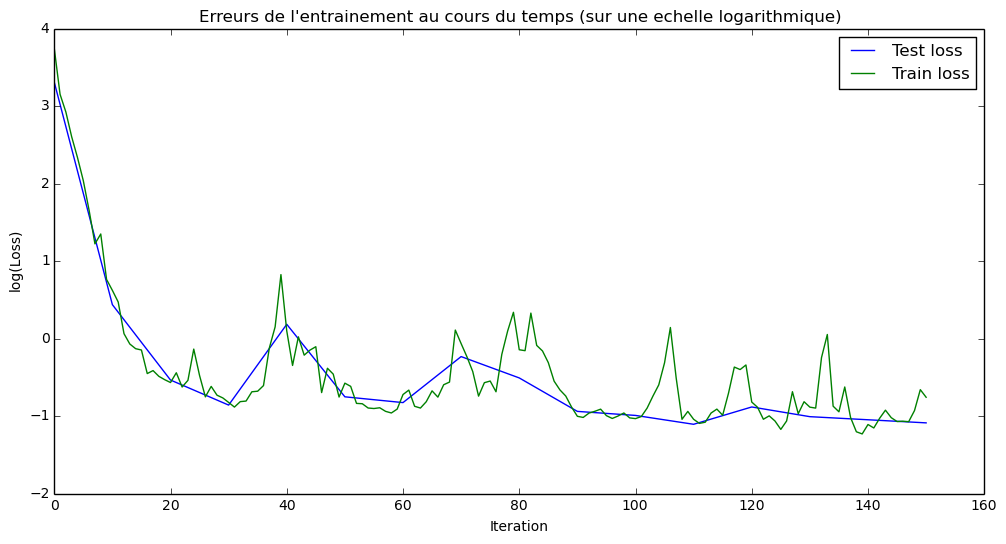

In [8]:

# Graphique des erreurs au fil du temps :
plt.figure(figsize=(12, 6))
plt.plot(
    np.array(range(0, len(test_losses)))/float(len(test_losses)-1)*(len(train_losses)-1), 
    np.log(test_losses), 
    label="Test loss"
)
plt.plot(
    np.log(train_losses), 
    label="Train loss"
)
plt.title("Erreurs de l'entrainement au cours du temps (sur une echelle logarithmique)")
plt.xlabel('Iteration')
plt.ylabel('log(Loss)')
plt.legend(loc='best')
plt.show()


## Visualisation de quelques résultats

Visualisons 5 prédictions quelconques avec nos signaux :


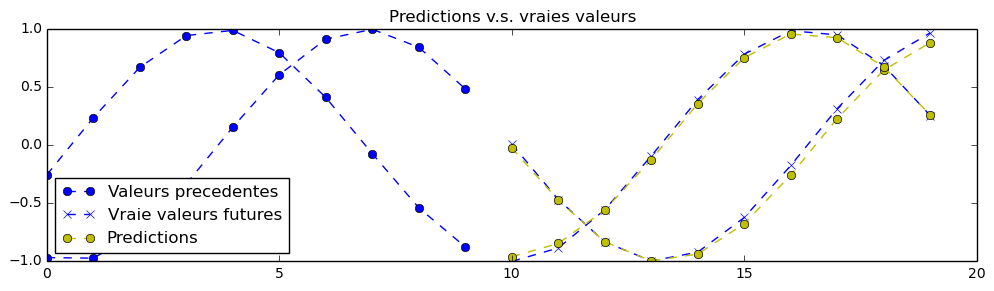

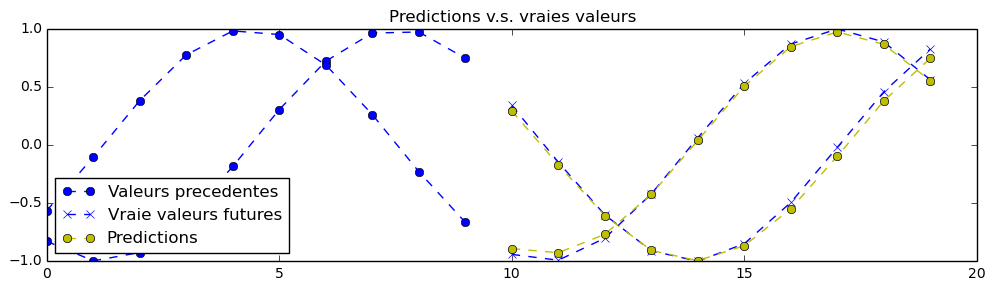

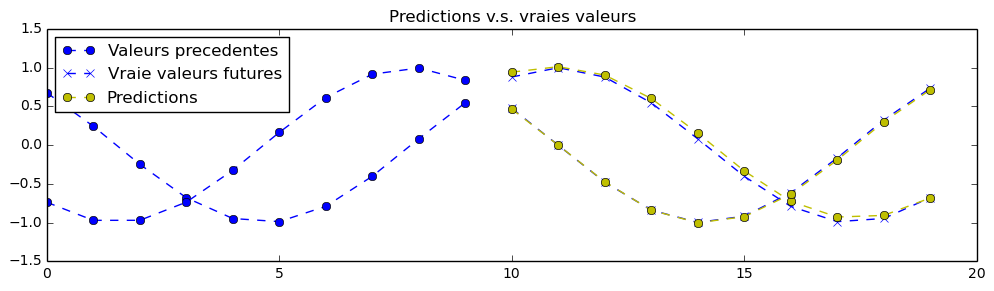

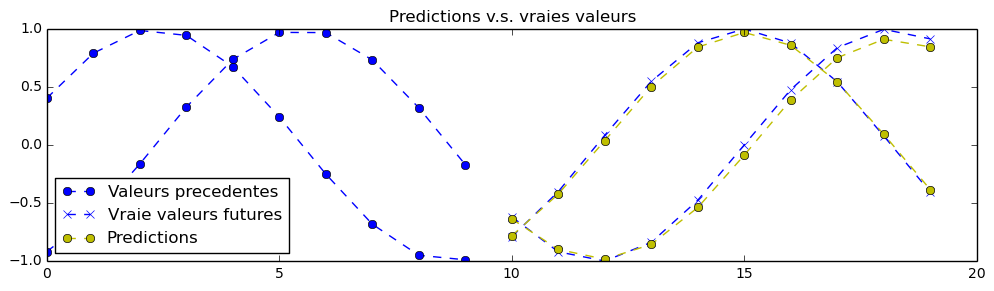

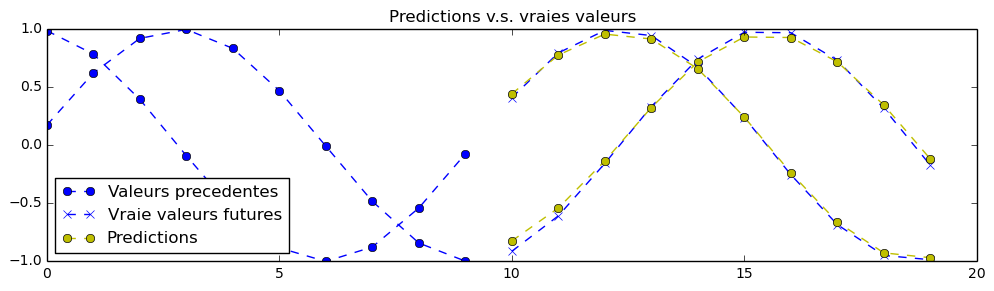

Le signal peut contenir plusieurs dimensions en sortie à la fois.
Si c'est le cas, les signaux sont empilés avec la même couleur.
En vrai, on pourrait imaginer plusieurs symboles boursiers évoluant dans le
même référentiel de temps, analysés en même temps par le même réseau de neurones.


In [9]:
# Tester
nb_predictions = 5
print "Visualisons {} prédictions quelconques avec nos signaux :".format(nb_predictions)

X, Y = generate_x_y_data(isTrain=False, batch_size=nb_predictions)
feed_dict = {enc_inp[t]: X[t] for t in range(seq_length)}
outputs = np.array(sess.run([reshaped_outputs], feed_dict)[0])

for j in range(nb_predictions): 
    plt.figure(figsize=(12, 3))
    
    for k in range(output_dim):
        past = X[:,j,k]
        expected = Y[:,j,k]
        pred = outputs[:,j,k]
        
        label1 = "Valeurs precedentes" if k==0 else "_nolegend_"
        label2 = "Vraie valeurs futures" if k==0 else "_nolegend_"
        label3 = "Predictions" if k==0 else "_nolegend_"
        plt.plot(range(len(past)), past, "o--b", label=label1)
        plt.plot(range(len(past), len(expected)+len(past)), expected, "x--b", label=label2)
        plt.plot(range(len(past), len(pred)+len(past)), pred, "o--y", label=label3)
    
    plt.legend(loc='best')
    plt.title("Predictions v.s. vraies valeurs")
    plt.show()

print "Le signal peut contenir plusieurs dimensions en sortie à la fois."
print "Si c'est le cas, les signaux sont empilés avec la même couleur."
print "En vrai, on pourrait imaginer plusieurs symboles boursiers évoluant dans le"
print "même référentiel de temps, analysés en même temps par le même réseau de neurones."